In [22]:
path = 'data/Q2/'
import networkx as nx
import pandas as pd
import dateutil.parser
import datetime
import numpy as np
from math import radians, sin, cos, acos
import operator
import matplotlib.pyplot as plt
import geopy.distance
!pip3 install pyproj
import plotly.graph_objs as go
from pyproj import Geod
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
import pickle
wgs84_geod = Geod(ellps='WGS84')

In [2]:
def Distance(lat1,lon1,lat2,lon2):
    az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2)
    return dist

In [3]:
def distance(slat, slon, elat, elon):
    dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
    return dist

In [4]:
def GetHomeFromDegrees(lat,lon):    
    if (len(lat) <= 0):
        return (0,0)
    newX = sum(lat)/len(lat)
    newY = sum(lon)/len(lon)
    return (newX,newY)

In [5]:
def dict_sort_des(diction):
    sorted_d = sorted(diction.items(), key=operator.itemgetter(1),reverse=True)
    return sorted_d

In [7]:
def plot_frequency(list1, list2):
    data = [go.Bar(x=list1,y=list2)]
    return py.iplot(data, filename='jupyter-basic_bar')

In [1]:
def showGraph(thresh_holds, precision, x, y):
    plt.plot(thresh_holds, precision, label = y)
    plt.ylabel(y)
    plt.title(x + ' Vs '+ y)
    plt.xlabel(x)
    plt.show()

In [ ]:
def datasplit(data):
    ploting_list = []
    value_list = []
    for k in (dict_sort_des(data)):
        ploting_list.append(k[0])
        value_list.append(k[1])
    return ploting_list, value_list

In [ ]:
my_graph = nx.Graph()
edges = nx.read_edgelist(path+'/Gowalla_edges.txt')
my_graph.add_edges_from(edges.edges())

In [23]:
df = pd.read_csv(path+'/Gowalla_totalCheckins.txt', sep="\t", header=None, names=["user", "time", "lat","long", "locid"])
df

user                  time        lat       long    locid
0             0  2010-10-19T23:55:27Z  30.235909 -97.795140    22847
1             0  2010-10-18T22:17:43Z  30.269103 -97.749395   420315
2             0  2010-10-17T23:42:03Z  30.255731 -97.763386   316637
3             0  2010-10-17T19:26:05Z  30.263418 -97.757597    16516
4             0  2010-10-16T18:50:42Z  30.274292 -97.740523  5535878
5             0  2010-10-12T23:58:03Z  30.261599 -97.758581    15372
6             0  2010-10-12T22:02:11Z  30.267910 -97.749312    21714
7             0  2010-10-12T19:44:40Z  30.269103 -97.749395   420315
8             0  2010-10-12T15:57:20Z  30.281120 -97.745211   153505
9             0  2010-10-12T15:19:03Z  30.269103 -97.749395   420315
10            0  2010-10-12T00:21:28Z  40.643885 -73.782806    23261
11            0  2010-10-11T20:21:20Z  40.741374 -73.988105    16907
12            0  2010-10-11T20:20:42Z  40.741388 -73.989455    12973
13            0  2010-10-11T00:06:30Z  40.724910 -73.994621   341255
14            0  2010-10-10T22:00:37Z  40.729768 -73.998535   260957
15            0  2010-10-10T21:17:14Z  40.728527 -73.996868  1933724
16            0  2010-10-10T17:47:04Z  40.741747 -73.993421   105068
17            0  2010-10-09T23:51:10Z  40.734193 -74.004164    34817
18            0  2010-10-09T22:27:07Z  40.742512 -74.006031    27836
19            0  2010-10-09T21:39:26Z  40.742396 -74.007543    15079
20            0  2010-10-09T21:36:05Z  40.742396 -74.007543    15079
21            0  2010-10-09T21:05:23Z  40.735885 -74.004968    22806
22            0  2010-10-09T20:55:47Z  40.727525 -73.985399  1365909
23            0  2010-10-09T01:37:03Z  40.756880 -73.986225    11844
24            0  2010-10-08T21:48:37Z  40.707417 -74.011363    11742
25            0  2010-10-08T21:45:48Z  40.707173 -74.010545    19822
26            0  2010-10-08T21:43:52Z  40.707071 -74.011953    15169
27            0  2010-10-08T21:43:02Z  40.705823 -73.996696    11794
28            0  2010-10-08T19:28:36Z  40.769378 -73.963083  1567837
29            0  2010-10-08T17:24:27Z  40.780805 -73.976473    35513
...         ...                   ...        ...        ...      ...
6442862  196577  2010-03-20T13:50:44Z  51.748408  -0.457842   394036
6442863  196577  2010-03-13T15:01:31Z  50.796290  -1.104657   472762
6442864  196577  2010-03-10T20:46:33Z  51.747870  -0.488194   496276
6442865  196578  2010-06-26T11:31:25Z  51.712110  -0.050458  1341442
6442866  196578  2010-06-12T11:18:56Z  51.741916  -0.496729  1174322
6442867  196578  2010-06-12T10:47:18Z  51.743782  -0.495793  1160482
6442868  196578  2010-06-12T10:47:07Z  51.742029  -0.497377   594064
6442869  196578  2010-06-12T10:46:54Z  51.746925  -0.501147   627093
6442870  196578  2010-06-12T10:07:39Z  51.744149  -0.505390   899939
6442871  196578  2010-06-11T15:42:58Z  51.746712  -0.514305   467635
6442872  196578  2010-06-11T15:42:32Z  51.747791  -0.491863  1250178
6442873  196578  2010-06-11T15:42:20Z  51.746296  -0.487218   797460
6442874  196578  2010-06-11T15:42:09Z  51.746330  -0.486929   496521
6442875  196578  2010-06-11T15:41:59Z  51.749802  -0.501034  1072999
6442876  196578  2010-06-11T15:41:39Z  51.749672  -0.500684  1151842
6442877  196578  2010-06-11T15:41:08Z  51.749706  -0.500992  1151847
6442878  196578  2010-06-11T15:40:46Z  51.749478  -0.500603   635712
6442879  196578  2010-06-11T15:40:01Z  51.749451  -0.500988   697962
6442880  196578  2010-06-11T15:38:57Z  51.742029  -0.497377   594064
6442881  196578  2010-06-11T15:38:43Z  51.746925  -0.501147   627093
6442882  196578  2010-06-11T15:38:20Z  51.744149  -0.505390   899939
6442883  196578  2010-06-11T13:33:40Z  51.745652  -0.487572   964995
6442884  196578  2010-06-11T13:33:27Z  51.746004  -0.486102   797488
6442885  196578  2010-06-11T13:32:50Z  51.745659  -0.481369   616571
6442886  196578  2010-06-11T13:32:40Z  51.745971  -0.485233   965051
6442887  196578  2010-06-11T13:32:26Z  51.742988  -0.488065   906885
6442888  

In [84]:
date_list = []
for k in df['time']:
    date_list.append(datetime.datetime.strptime(k, "%Y-%m-%dT%H:%M:%SZ"))
date_list
df['time'] = date_list
df.head()

user                time        lat       long    locid
0     0 2010-10-19 23:55:27  30.235909 -97.795140    22847
1     0 2010-10-18 22:17:43  30.269103 -97.749395   420315
2     0 2010-10-17 23:42:03  30.255731 -97.763386   316637
3     0 2010-10-17 19:26:05  30.263418 -97.757597    16516
4     0 2010-10-16 18:50:42  30.274292 -97.740523  5535878

In [ ]:
lat_list = []
long_list = []
for k in df['lat']:
    lat_list.append(float(k))
for k in df['long']:
    long_list.append(float(k))
df['lat'] = lat_list
df['long'] = long_list
df.head()

user                  time        lat       long    locid
0     0  2010-10-19T23:55:27Z  30.235909 -97.795140    22847
1     0  2010-10-18T22:17:43Z  30.269103 -97.749395   420315
2     0  2010-10-17T23:42:03Z  30.255731 -97.763386   316637
3     0  2010-10-17T19:26:05Z  30.263418 -97.757597    16516
4     0  2010-10-16T18:50:42Z  30.274292 -97.740523  5535878

In [ ]:
user_center = {}
users = list(set(df['user']))

In [ ]:
for k in users:
    df_user=df[(df['user']== k)]
    ulat_list = df_user['lat']
    ulong_list = df_user['long']
    m = GetHomeFromDegrees(ulat_list,ulong_list)
    user_center[k] = m
user_center

Distance from home user tends to travel -> frequency of users vs Distance from home.

In [ ]:
user_distances = {}
for k in users:
    df_user=df[(df['user']== k)]
    ulat_list = df_user['lat']
    ulong_list = df_user['long']
    user_distances[k] = []
    origins = user_center[k]
    for f, b in zip(ulat_list, ulong_list):
        user_distances[k].append(round(Distance(origins[0],origins[1], f,b), 4))     

In [163]:
distances = []
for k in user_distances.values():
    distances.extend(k)
distances = list(set(distances))
print(len(distances))
distances = [x for x in distances if ~np.isnan(x)]
print((distances[:50]))

3932660
[0.0, 15.8125, 30.375, 31.125, 32.75, 53.625, 61.9375, 65.375, 66.3089, 75.4339, 78.7464, 79.8786, 86.2464, 91.4411, 92.5625, 97.4375, 108.1911, 114.25, 116.125, 119.75, 122.2536, 126.6911, 131.5553, 132.4375, 133.9928, 134.5, 138.8125, 140.0625, 140.6322, 10263.1752, 144.5553, 149.7536, 151.8197, 151.6947, 152.1875, 164.0697, 167.2428, 32.6875, 170.0072, 174.3678, 176.8822, 177.5553, 178.1214, 177.8125, 180.4928, 180.7464, 186.6803, 189.1322, 190.5553, 192.875]


In [ ]:
distance_freq = {}
for m in distances:
    if int(m) not in distance_freq.keys():
        distance_freq[int(m)] = 1
    else:
        distance_freq[int(m)] += 1

# PART 1

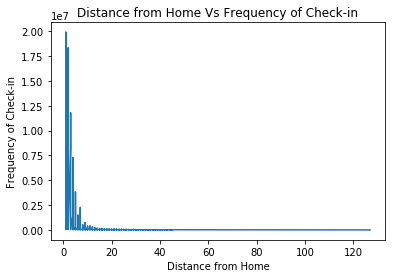

In [171]:
ploting_list, value_list = datasplit(distance_freq)
showGraph(ploting_list, value_list,'Distance from Home', 'Frequency of Check-in')

In [ ]:
userNumber = 0
friends_of_user = []
for k in my_graph.neighbors(str(users[userNumber])):
  if int(k) in user_center.keys():
    friends_of_user.append((k, user_center[int(k)]))

In [ ]:
distance_freq = {}
distances = user_distances[userNumber]
for m in distances:
  if int(m) not in distance_freq.keys():
    distance_freq[int(m)] = 1
  else:
    distance_freq[int(m)] += 1

In [169]:
distance_friend_freq = {}
df_user=df[(df['user']== users[userNumber])]
ulat_list = df_user['lat']
ulong_list = df_user['long']
h = user_center[int(users[userNumber])]
for f, b in zip(ulat_list, ulong_list):
    d = int(Distance(h[0],h[1], f,b))
    for k in friends_of_user:
        if (int(Distance(k[1][0],k[1][1], f,b))) <= 25000.0:
            if d not in distance_friend_freq.keys():
                distance_friend_freq[d] = 1
            else:
                distance_friend_freq[d] += 1
c = 0
for k in distance_friend_freq.keys():
    try:
        distance_friend_freq[k] /= (distance_freq[k])
    except:
        c +=1
        continue

0

# PART 2

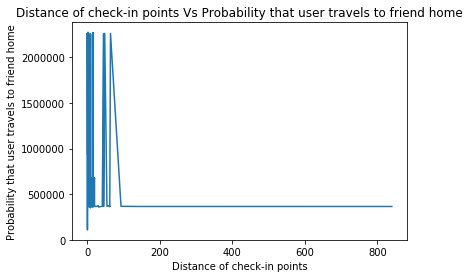

In [170]:
ploting_list, value_list = datasplit(distance_friend_freq)
showGraph(value_list, ploting_list,'Distance of check-in points','Probability that user travels to friend home')

In [85]:
df['time'].head()

0   2010-10-19 23:55:27
1   2010-10-18 22:17:43
2   2010-10-17 23:42:03
3   2010-10-17 19:26:05
4   2010-10-16 18:50:42
Name: time, dtype: datetime64[ns]

In [92]:
df['time'].iloc[[0]].iloc[0] > df['time'].iloc[[1]].iloc[0]

True

In [93]:
df.head()

user                time        lat       long    locid
0     0 2010-10-19 23:55:27  30.235909 -97.795140    22847
1     0 2010-10-18 22:17:43  30.269103 -97.749395   420315
2     0 2010-10-17 23:42:03  30.255731 -97.763386   316637
3     0 2010-10-17 19:26:05  30.263418 -97.757597    16516
4     0 2010-10-16 18:50:42  30.274292 -97.740523  5535878

In [ ]:
userid = 0
userdata = df.groupby('user').get_group(userid)

In [ ]:
df['lat-long'] = list(zip(df.lat, df.long))

In [108]:
df.head()

user                time        lat       long    locid  \
0     0 2010-10-19 23:55:27  30.235909 -97.795140    22847   
1     0 2010-10-18 22:17:43  30.269103 -97.749395   420315   
2     0 2010-10-17 23:42:03  30.255731 -97.763386   316637   
3     0 2010-10-17 19:26:05  30.263418 -97.757597    16516   
4     0 2010-10-16 18:50:42  30.274292 -97.740523  5535878   

                               new_col                             lat-long  
0      (30.2359091167, -97.7951395833)      (30.2359091167, -97.7951395833)  
1      (30.2691029532, -97.7493953705)      (30.2691029532, -97.7493953705)  
2      (30.2557309927, -97.7633857727)      (30.2557309927, -97.7633857727)  
3      (30.2634181234, -97.7575966669)      (30.2634181234, -97.7575966669)  
4  (30.2742918584, -97.74052262309999)  (30.2742918584, -97.74052262309999)

In [ ]:
check_in = []
userid = 0
for i in range(len(userdata)):
    user = userdata.iloc[[i]]['user'].iloc[0]
    time = userdata.iloc[[i]]['time'].iloc[0]
    lat = userdata.iloc[[i]]['lat'].iloc[0]
    long = userdata.iloc[[i]]['long'].iloc[0]
    locid = userdata.iloc[[i]]['locid'].iloc[0]
    count = 0
    data = df.groupby('lat-long').get_group((lat, long))
    for index in range(i, len(data), 1):
        if data.iloc[[index]]['user'].iloc[0] != user and data.iloc[[index]]['time'].iloc[0] < time:
            count += 1
    check_in.append((locid, count))

In [ ]:
result = {}
for val1, val2 in check_in:
    result[val1] = val2

# PART 3

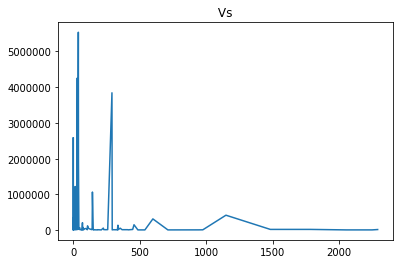

In [178]:
ploting_list, value_list = datasplit(result)
showGraph(value_list, ploting_list, 'count of friends check-in before', 'location Id')